# Test Task / Insilico Medicine

In this task, we have obfuscated expression data (file ‘Obfuscated_expression_quantile_normalized’, expression microarray, raw expression values have already been quantile normalized) and we need to hypothesize what type of medical condition differentiates Cases from Controls.

Also, two types of additional resources that may help us for further analysis have been prepared:

1. file ‘curated_gene_disease_associations_disgenet’ contains known curated lists of
gene-disease associations from the DisGeNet database,

2. file 'genes_mapping.csv',

3. file ‘example_ppi_graph_omnipath_10k_nodes’ contains a subset of publication
asserted protein-protein interactions (ppi graph) from Omnipath.

p.s in this task, we are going to do Exploratory Data Analysis (more inf. here https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15).

In [1]:
import pandas as pd

# input data

data = pd.read_csv('Obfuscated_expression_quantile_normalized.csv')
data

,Unnamed: 0,sample_id,ensembl_gene_id,value
0,0,Control_4,ENSG00000121410,314.224025
1,1,Control_4,ENSG00000268895,253.844427
2,2,Control_4,ENSG00000148584,5846.086659
3,3,Control_4,ENSG00000175899,26272.874838
4,4,Control_4,ENSG00000166535,163.242284
...,...,...,...,...
906649,906649,Case_4,ENSG00000203995,232.893444
906650,906650,Case_4,ENSG00000162378,3744.070612
906651,906651,Case_4,ENSG00000159840,1347.173796
906652,906652,Case_4,ENSG00000074755,1079.302248


In [2]:
data['sample_id'].nunique() # we have 42 case_ and control_ patients at all

42

In [3]:
data['sample_id'].value_counts(dropna=False) # each control_/case_ patient contains 21587 gene expression results

Control_4     21587
Case_8        21587
Case_3        21587
Case_13       21587
Case_10       21587
Case_5        21587
Case_14       21587
Case_15       21587
Case_1        21587
Case_17       21587
Case_9        21587
Control_13    21587
Case_11       21587
Case_6        21587
Case_19       21587
Case_0        21587
Case_16       21587
Case_12       21587
Case_2        21587
Case_20       21587
Case_18       21587
Case_7        21587
Control_10    21587
Control_12    21587
Control_18    21587
Control_14    21587
Control_9     21587
Control_8     21587
Control_5     21587
Control_3     21587
Control_0     21587
Control_11    21587
Control_1     21587
Control_19    21587
Control_7     21587
Control_2     21587
Control_20    21587
Control_17    21587
Control_16    21587
Control_15    21587
Control_6     21587
Case_4        21587
Name: sample_id, dtype: int64

In [4]:
data['ensembl_gene_id'].value_counts(dropna=False) #

ENSG00000121410    42
ENSG00000143106    42
ENSG00000222028    42
ENSG00000205220    42
ENSG00000008018    42
                   ..
ENSG00000130589    42
ENSG00000198265    42
ENSG00000187821    42
ENSG00000163312    42
ENSG00000036549    42
Name: ensembl_gene_id, Length: 21587, dtype: int64

In [5]:
data.columns # 'sample_id', 'value' - needed for further analysis

Index(['Unnamed: 0', 'sample_id', 'ensembl_gene_id', 'value'], dtype='object')

In [6]:
# let's load additional resource # 1

data_1 = pd.read_csv('curated_gene_disease_associations.tsv', sep='\t')
data_1.head()

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
0,1,A1BG,0.700,0.538,C0019209,Hepatomegaly,phenotype,C23;C06,Finding,0.30,1.000,2017.0,2017.0,1,0,CTD_human
1,1,A1BG,0.700,0.538,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.30,1.000,2015.0,2015.0,1,0,CTD_human
2,2,A2M,0.529,0.769,C0002395,Alzheimer's Disease,disease,C10;F03,Disease or Syndrome,0.50,0.769,1998.0,2018.0,3,0,CTD_human
3,2,A2M,0.529,0.769,C0007102,Malignant tumor of colon,disease,C06;C04,Neoplastic Process,0.31,1.000,2004.0,2019.0,1,0,CTD_human
4,2,A2M,0.529,0.769,C0009375,Colonic Neoplasms,group,C06;C04,Neoplastic Process,0.30,1.000,2004.0,2004.0,1,0,CTD_human


In [7]:
data_1.shape # 84038 rows, 16 columns

(84038, 16)

In [8]:
data_1.columns

Index(['geneId', 'geneSymbol', 'DSI', 'DPI', 'diseaseId', 'diseaseName',
       'diseaseType', 'diseaseClass', 'diseaseSemanticType', 'score', 'EI',
       'YearInitial', 'YearFinal', 'NofPmids', 'NofSnps', 'source'],
      dtype='object')

In [9]:
# let's load additional resource # 2

data_2 = pd.read_csv('genes_mapping.csv')
data_2

,Unnamed: 0,ensembl_gene_id,gene_symbol
0,0,ENSG00000210049,MT-TF
1,1,ENSG00000211459,MT-RNR1
2,2,ENSG00000210077,MT-TV
3,3,ENSG00000210082,MT-RNR2
4,4,ENSG00000209082,MT-TL1
...,...,...,...
67135,67135,ENSG00000279143,AC139099.3
67136,67136,ENSG00000262898,AC139099.2
67137,67137,ENSG00000262094,AC139099.1
67138,67138,ENSG00000232938,RPL23AP87


In [10]:
data_2.columns # 'gene_symbol' - needed for further analysis

Index(['Unnamed: 0', 'ensembl_gene_id', 'gene_symbol'], dtype='object')

### Comparison of Control_ and Case_ gene expression results, PCA

In [11]:
data.head() # let's look at the main data

,Unnamed: 0,sample_id,ensembl_gene_id,value
0,0,Control_4,ENSG00000121410,314.224025
1,1,Control_4,ENSG00000268895,253.844427
2,2,Control_4,ENSG00000148584,5846.086659
3,3,Control_4,ENSG00000175899,26272.874838
4,4,Control_4,ENSG00000166535,163.242284


In [17]:
df = data.pivot_table(index='ensembl_gene_id', columns='sample_id', values='value') # a little transformation of our table
df
dataframe = df.copy() # for further analysis

In [ ]:
#

In [19]:
import scipy.stats as stats

for name in list(df.columns):
   df.loc[:,name], fit_boxcox = stats.boxcox(df.loc[:,name])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

df = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)

Histograms for Case and Control patients:
axis x indicates Normalized value
axis y indicates Number of gene expression
blue is for Case patient, yellow - for Control patient
For instance, the 1st plot shows histograms distribution for Case_0 and Control_0.


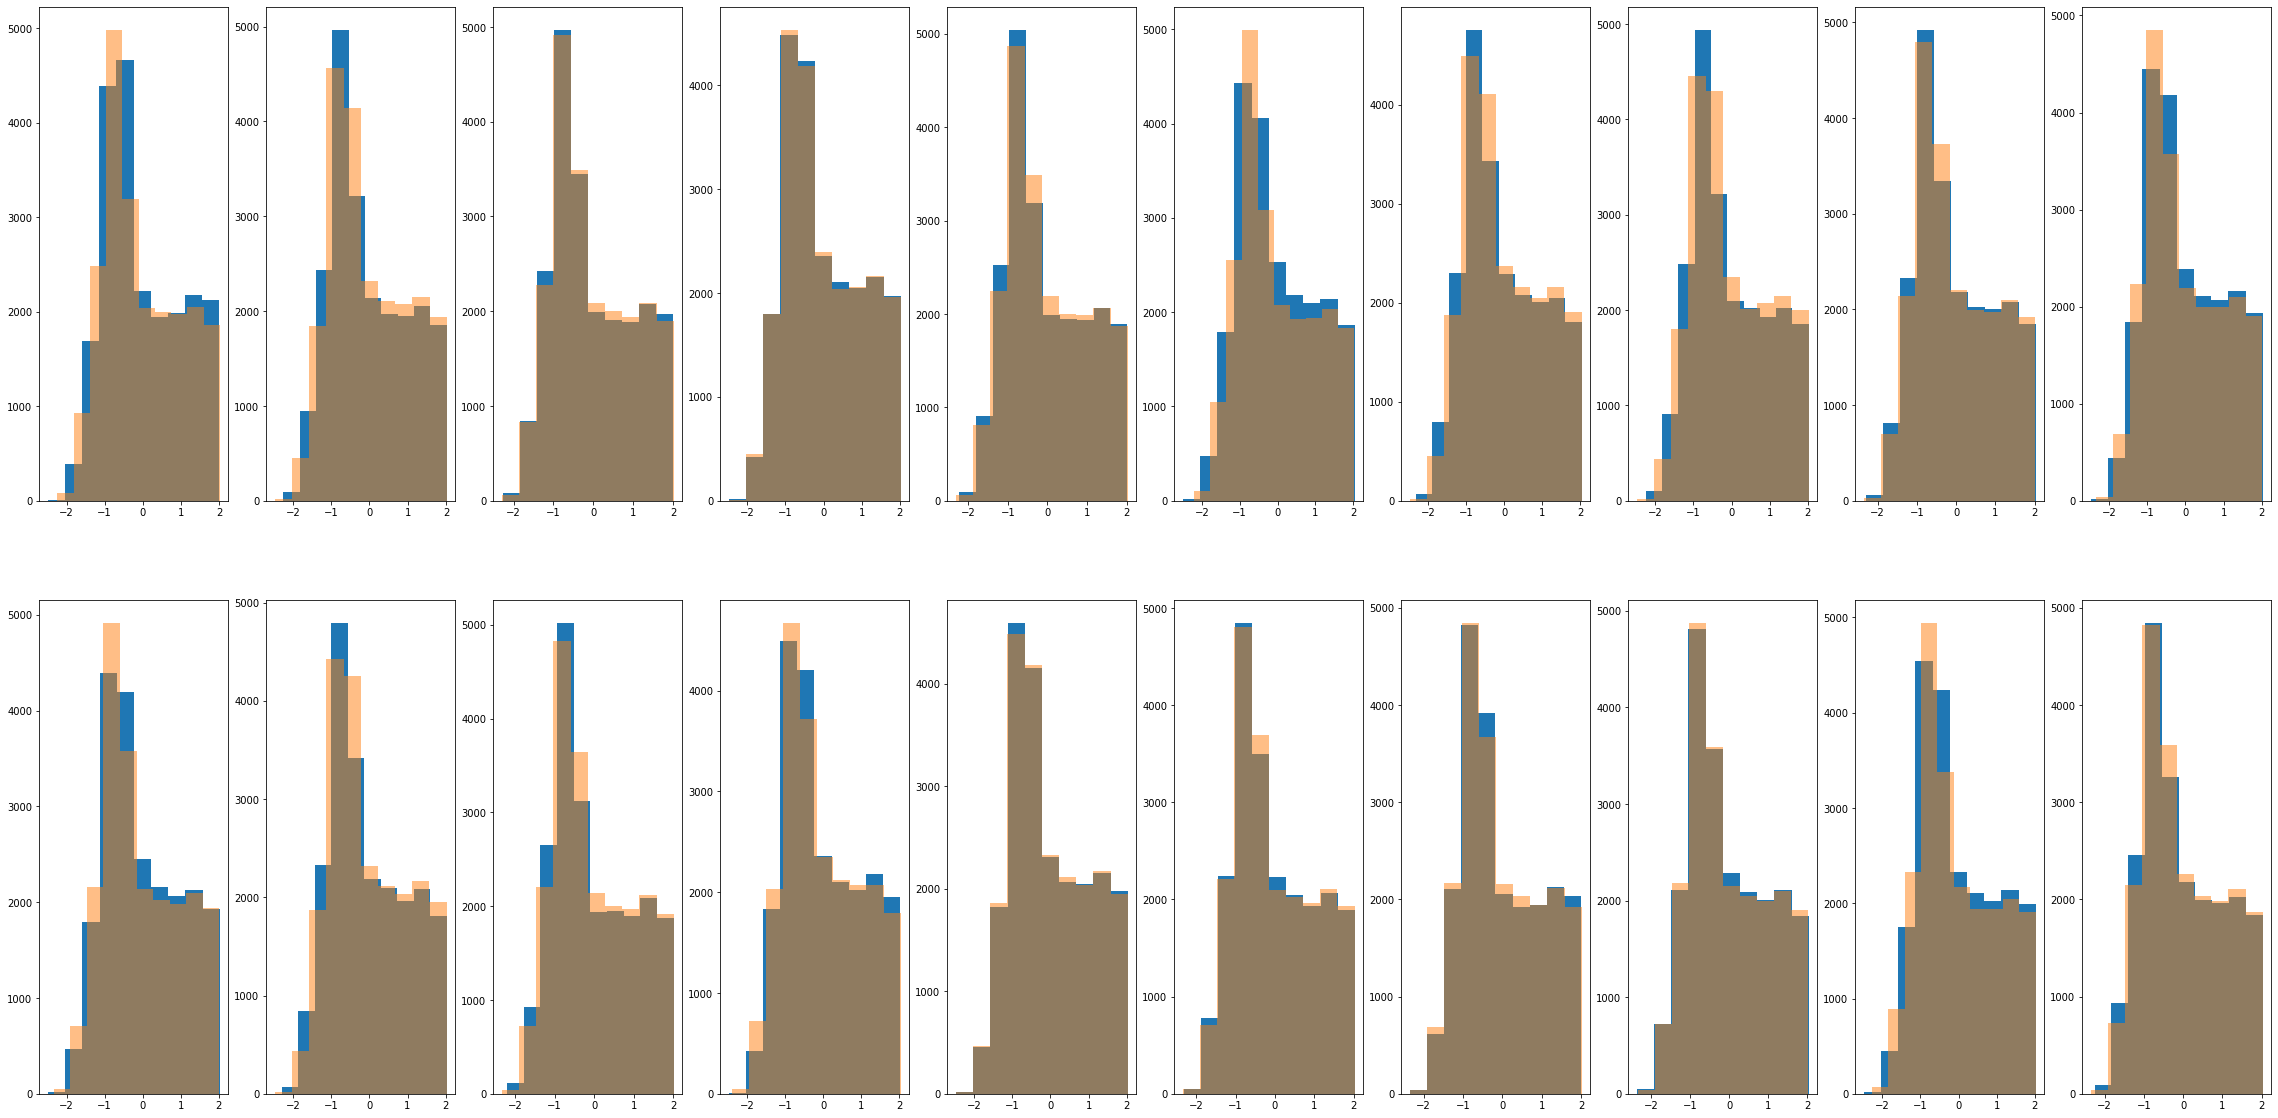

In [21]:
import matplotlib.pyplot as plt

print('Histograms for Case and Control patients:')
print('axis x indicates Normalized value')
print('axis y indicates Number of gene expression')
print('blue is for Case patient, yellow - for Control patient')
print('For instance, the 1st plot shows histograms distribution for Case_0 and Control_0.')
fig, ax = plt.subplots(ncols=10,nrows=2,figsize=(40,20))
ax = ax.flatten()
for i in range(20): 
    ax[i].hist(df[f'Case_{i}'], alpha = 1, label = f'Case_{i}')
    ax[i].hist(df[f'Control_{i}'], alpha = 0.5, label = f'Control_{i}')

In [ ]:
# As we may see, for each case [Case_0-Control_0, Case_1-Control_1] we get almost equal histograms distribution for Case_i and Control_i.

PCA (Principal Component Analysis):

In [22]:
dft = df.transpose()
dft.head()

ensembl_gene_id,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000285975,ENSG00000286065,ENSG00000288235,ENSG00000288357,ENSG00000288607,ENSG00000288611,ENSG00000288616,ENSG00000288631,ENSG00000288642,ENSG00000288649
sample_id,,,,,,,,,,,,,,,,,,,,,
Case_0,1.356146,-1.177368,1.550956,-0.008986,0.443116,1.833116,0.567056,0.894008,-0.791557,-0.804442,...,-0.950597,-1.072414,-0.959842,0.501284,-0.484051,-1.639257,-0.849724,-1.946118,-1.599496,-0.431192
Case_1,1.411779,-0.794463,1.577083,0.118176,0.430102,1.920677,0.639115,1.324200,-0.466073,-0.642321,...,-0.708133,-0.601477,-0.880431,-0.310253,-0.621475,-1.797756,-0.848259,-1.577330,-1.420937,-0.458674
Case_10,1.394390,-1.374208,1.672929,-0.055108,0.181501,1.823669,0.717367,1.106575,-0.517012,-0.395510,...,-0.923689,-0.694397,-0.444713,-0.706521,-0.564634,-1.423874,-1.031622,-1.847532,-1.708311,-0.586955
Case_11,1.271137,-1.556397,1.602845,-0.027686,0.648792,1.874838,0.741404,0.972422,-0.583070,-0.831470,...,-0.689688,-0.611565,-0.814481,-0.365181,-0.583168,-1.431752,-1.373507,-1.899375,-1.456639,-0.524044
Case_12,1.316276,-1.062138,1.600349,-0.129683,0.757436,1.840215,0.542907,0.738726,-0.960646,-0.783186,...,-0.940060,-0.790729,-0.924635,0.163348,-0.608182,-1.329118,-0.924150,-1.664851,-1.566703,-0.770304


In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 25) # we need to decrease it from 42 to, let's say, 25 to achieve cumsum explained variance more than 80 percent
pca.fit(dft)  
dft_pca = pca.transform(dft)

In [24]:
pca.explained_variance_ratio_.cumsum()

array([0.21947001, 0.32037002, 0.39690323, 0.44650515, 0.48419415,
       0.51244314, 0.54058413, 0.56348102, 0.58486248, 0.60425675,
       0.62268215, 0.64002863, 0.65595863, 0.67138064, 0.6860549 ,
       0.70050114, 0.71476466, 0.72865481, 0.74207994, 0.75543684,
       0.76851534, 0.78141265, 0.79414264, 0.80666032, 0.81905168])

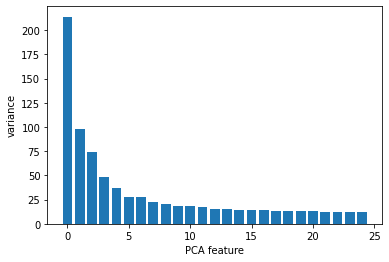

In [25]:
plt.bar(range(pca.n_components_),pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

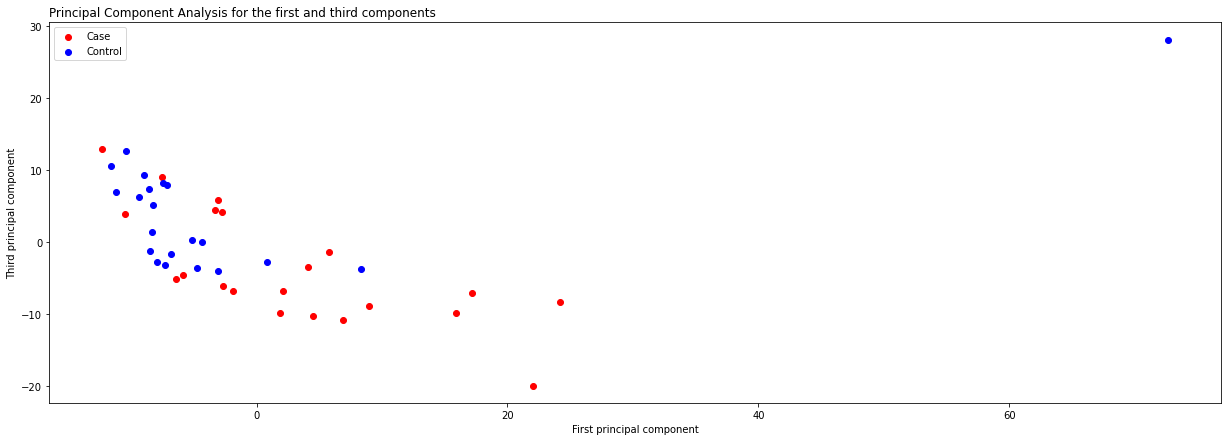

In [26]:
import numpy as np 

case = np.array(['Case' in col for col in df.columns])
plt.figure(figsize=(21,7))
plt.title('Principal Component Analysis for the first and third components', loc = 'left')
plt.scatter(dft_pca[case, 0], dft_pca[case, 2], color='red', label='Case')
plt.scatter(dft_pca[~case, 0], dft_pca[~case, 2], color='blue', label='Control')
plt.xlabel('First principal component')
plt.ylabel('Third principal component')
plt.legend()
plt.show()

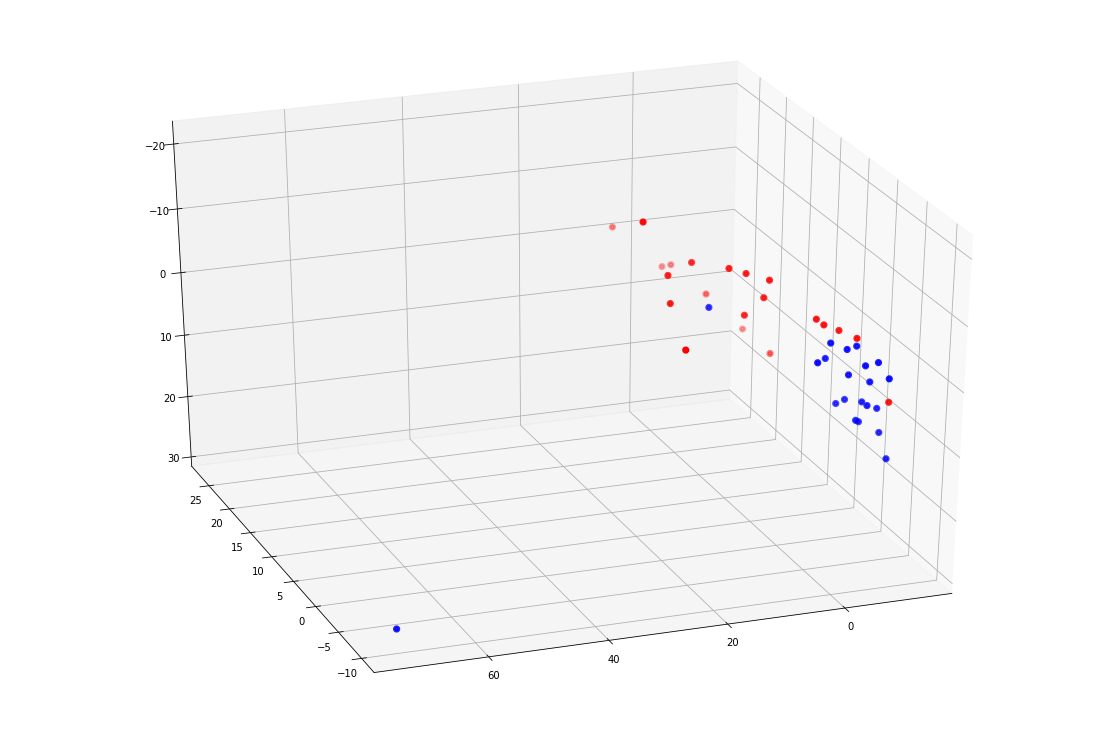

In [27]:
from mpl_toolkits.mplot3d import Axes3D

colors = ['red' if 'Case' in col else 'blue' for col in df.columns]
fig = plt.figure(1, figsize=(15,10))
ax = Axes3D(fig, elev = -150, azim = 110,)
ax.scatter(dft_pca[:, 0], dft_pca[:, 1], dft_pca[:, 2], c = colors, cmap = plt.cm.Paired, linewidths = 2.7)

We may see based on the 3d image above that Case and Control groups are clustered and differ from each other pretty good.

In this section, let's create a hetmap for finding a correlation between all Control and Cases:

In [28]:
corr_matrix = df.corr()
corr_matrix.head()

sample_id,Case_0,Case_1,Case_10,Case_11,Case_12,Case_13,Case_14,Case_15,Case_16,Case_17,...,Control_19,Control_2,Control_20,Control_3,Control_4,Control_5,Control_6,Control_7,Control_8,Control_9
sample_id,,,,,,,,,,,,,,,,,,,,,
Case_0,1.000000,0.954160,0.905398,0.950148,0.960693,0.950759,0.954333,0.948328,0.969039,0.926352,...,0.947212,0.952333,0.956487,0.954997,0.952982,0.950945,0.943695,0.957702,0.952240,0.954415
Case_1,0.954160,1.000000,0.932358,0.963539,0.952617,0.972199,0.972604,0.971242,0.954011,0.948889,...,0.969855,0.964701,0.965682,0.974679,0.973827,0.974283,0.961132,0.969461,0.974688,0.971190
Case_10,0.905398,0.932358,1.000000,0.941681,0.922375,0.941736,0.925135,0.944287,0.914443,0.944515,...,0.943718,0.924739,0.926682,0.936435,0.936616,0.929188,0.941031,0.925066,0.932643,0.928734
Case_11,0.950148,0.963539,0.941681,1.000000,0.960807,0.968340,0.963640,0.967349,0.953337,0.957538,...,0.968219,0.961363,0.966746,0.964399,0.968156,0.961276,0.970139,0.962500,0.960338,0.964871
Case_12,0.960693,0.952617,0.922375,0.960807,1.000000,0.959912,0.945501,0.960830,0.971103,0.949479,...,0.951285,0.946792,0.946948,0.948448,0.953260,0.945130,0.962632,0.947734,0.945302,0.946708


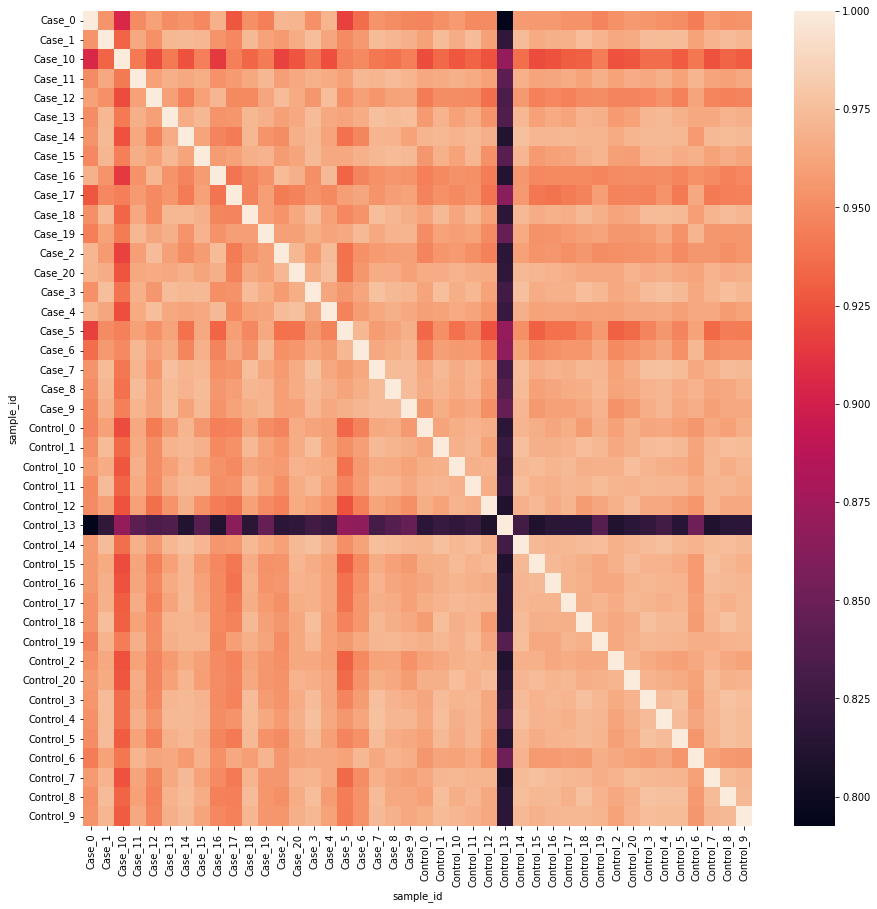

In [29]:
import seaborn as sns 

plt.figure(figsize = (15,15))
sns.heatmap(corr_matrix);
# this is interesting, that control_13 has the smallest correlation (~0.8-0.825) w/ others (even with case_13)

TODO: create a PCA based on gene expression results (900000+ dots on a plot) (with two big clusters - Case and Control) to identify interesting outcomes and possibly conclude about smth.

### Main analysis

The aim of the task is to find what type of medical condition can differentiate Cases from Controls.

Medical condition is a very broad term. It can refer to any kind of disease, disorder, injury, or illness, including mental illnesses. We may look at the information about it (in terms of this task) here [columns w/ 'Disease..' info]:

In [30]:
data_1.head()

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
0,1,A1BG,0.700,0.538,C0019209,Hepatomegaly,phenotype,C23;C06,Finding,0.30,1.000,2017.0,2017.0,1,0,CTD_human
1,1,A1BG,0.700,0.538,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.30,1.000,2015.0,2015.0,1,0,CTD_human
2,2,A2M,0.529,0.769,C0002395,Alzheimer's Disease,disease,C10;F03,Disease or Syndrome,0.50,0.769,1998.0,2018.0,3,0,CTD_human
3,2,A2M,0.529,0.769,C0007102,Malignant tumor of colon,disease,C06;C04,Neoplastic Process,0.31,1.000,2004.0,2019.0,1,0,CTD_human
4,2,A2M,0.529,0.769,C0009375,Colonic Neoplasms,group,C06;C04,Neoplastic Process,0.30,1.000,2004.0,2004.0,1,0,CTD_human


Let's find the maximum difference in gene expression between each Case_i and Control_i (for each ensembl gene id) in absolute values:

In [31]:
dataframe.head()

sample_id,Case_0,Case_1,Case_10,Case_11,Case_12,Case_13,Case_14,Case_15,Case_16,Case_17,...,Control_19,Control_2,Control_20,Control_3,Control_4,Control_5,Control_6,Control_7,Control_8,Control_9
ensembl_gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,1250.807912,1407.113009,1374.789246,1143.298512,1186.887142,1512.852904,1603.869140,1541.646054,1105.216808,967.867761,...,1228.782480,1664.710861,1283.846334,1962.300322,1652.108964,1596.454420,1448.467874,1530.098965,1412.747037,1405.984306
ENSG00000000005,199.872988,233.376573,188.317545,176.483276,209.642045,235.146474,221.795537,223.755599,194.340327,215.057732,...,190.723523,208.182973,199.753287,195.181631,342.461719,214.469764,203.658412,209.044940,220.950031,182.751631
ENSG00000000419,1871.510085,2018.659799,2642.494123,2228.284178,2149.811519,2430.405823,1886.405245,2319.619299,2018.960201,1875.689397,...,1849.854334,2157.560884,1561.943043,1982.196208,2364.587398,2335.468322,2240.549712,2410.066329,2536.157461,1665.996487
ENSG00000000457,340.109237,371.500470,339.069176,346.548239,320.918254,348.321159,367.700308,316.332944,308.417903,400.210893,...,381.411047,429.952067,331.764508,374.866971,353.211810,393.618799,349.301549,380.981163,399.893972,341.378258
ENSG00000000938,456.530371,459.063405,391.532984,560.409076,600.267154,385.065319,458.888932,465.992214,439.971570,788.609562,...,494.568981,520.739040,443.028162,415.457330,409.107854,434.544274,563.259513,437.173177,370.861425,547.570925


In [32]:
df_difs = pd.DataFrame()

for i in range(21):
  df_difs[f'Difference_for_{i}'] = abs(dataframe[f'Case_{i}'] - dataframe[f'Control_{i}'])

In [33]:
df_difs.head()

,Difference_for_0,Difference_for_1,Difference_for_2,Difference_for_3,Difference_for_4,Difference_for_5,Difference_for_6,Difference_for_7,Difference_for_8,Difference_for_9,...,Difference_for_11,Difference_for_12,Difference_for_13,Difference_for_14,Difference_for_15,Difference_for_16,Difference_for_17,Difference_for_18,Difference_for_19,Difference_for_20
ensembl_gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,259.994162,17.213484,349.356780,299.091760,446.734584,73.679950,328.921109,233.742738,245.374316,134.222622,...,411.381172,223.077862,1157.710502,154.556587,108.459130,382.914942,429.931676,141.906158,204.700017,155.715872
ENSG00000000005,2.006983,9.647445,0.037751,37.175127,138.019535,30.487363,77.893189,6.854985,4.515262,34.878418,...,14.162981,3.959330,33.562500,21.314452,48.851068,27.179370,10.895268,14.954917,17.756939,7.145682
ENSG00000000419,564.339879,173.907939,83.951299,512.268978,500.775464,319.086437,3.265914,386.907399,875.090967,282.606119,...,471.990048,494.761444,405.772590,145.498125,468.455767,76.601568,98.717512,355.715085,561.924899,744.069596
ENSG00000000457,18.875209,28.706847,118.436173,7.698787,20.605723,8.897719,18.228349,2.542499,31.186822,18.061907,...,26.365468,48.014481,33.634123,24.460856,33.461432,45.046063,36.876953,17.359484,25.229560,44.276502
ENSG00000000938,167.224984,97.867936,41.019453,130.172775,118.302238,86.585974,45.207559,42.903987,132.152147,20.753613,...,25.961844,147.208454,104.413759,21.006791,6.624497,34.721212,135.228154,13.174352,8.927646,74.656363


In [34]:
list_ensg = []
for i in range(21):
  a = df_difs[f'Difference_for_{i}'].max()
  print(f'max gene expression dif - Case-Control_{i}:',df_difs[f'Difference_for_{i}'].max())
  b = df_difs[df_difs[f'Difference_for_{i}'].isin([a])]
  list_ensg.append(b.index.tolist())
  print(b.index.tolist())

max gene expression dif - Case-Control_0: 23775.930357142897
['ENSG00000139644']
max gene expression dif - Case-Control_1: 40017.35992857144
['ENSG00000132693']
max gene expression dif - Case-Control_2: 22652.383571428596
['ENSG00000198417']
max gene expression dif - Case-Control_3: 48961.21564880949
['ENSG00000105697']
max gene expression dif - Case-Control_4: 20275.4102380953
['ENSG00000021826']
max gene expression dif - Case-Control_5: 24233.8698809524
['ENSG00000110169']
max gene expression dif - Case-Control_6: 50635.489845238146
['ENSG00000105697']
max gene expression dif - Case-Control_7: 17788.205607142798
['ENSG00000166741']
max gene expression dif - Case-Control_8: 19241.082857142897
['ENSG00000080910']
max gene expression dif - Case-Control_9: 38309.5258333333
['ENSG00000125144']
max gene expression dif - Case-Control_10: 48753.33289047616
['ENSG00000198074']
max gene expression dif - Case-Control_11: 23268.271369047594
['ENSG00000285219']
max gene expression dif - Case-Cont

In [35]:
list_ensgs = []
for id in list_ensg:
  list_ensgs.append(', '.join(id))
  
list_ensgs # now, let's use the list of ENSG.. ids for the data_2

['ENSG00000139644',
 'ENSG00000132693',
 'ENSG00000198417',
 'ENSG00000105697',
 'ENSG00000021826',
 'ENSG00000110169',
 'ENSG00000105697',
 'ENSG00000166741',
 'ENSG00000080910',
 'ENSG00000125144',
 'ENSG00000198074',
 'ENSG00000285219',
 'ENSG00000132693',
 'ENSG00000130649',
 'ENSG00000105697',
 'ENSG00000166710',
 'ENSG00000105697',
 'ENSG00000244734',
 'ENSG00000125144',
 'ENSG00000165949',
 'ENSG00000132693']

In [36]:
data_2[data_2['ensembl_gene_id'].isin(list_ensgs)]

,Unnamed: 0,ensembl_gene_id,gene_symbol
18737,18737,ENSG00000285219,HULC
20148,20148,ENSG00000166710,B2M
33791,33791,ENSG00000165949,IFI27
34693,34693,ENSG00000244734,HBB
35381,35381,ENSG00000110169,HPX
38526,38526,ENSG00000139644,TMBIM6
39271,39271,ENSG00000198417,MT1F
39276,39276,ENSG00000125144,MT1G
42406,42406,ENSG00000105697,HAMP
46469,46469,ENSG00000198074,AKR1B10


In [ ]:
# now we may select all these found genes and go to the dataset_1

In [37]:
genes_list = data_2[data_2['ensembl_gene_id'].isin(list_ensgs)]['gene_symbol'].tolist()
genes_list

['HULC',
 'B2M',
 'IFI27',
 'HBB',
 'HPX',
 'TMBIM6',
 'MT1F',
 'MT1G',
 'HAMP',
 'AKR1B10',
 'CYP2E1',
 'NNMT',
 'CRP',
 'CPS1',
 'CFHR2']

In [39]:
df_resulted = pd.DataFrame()

for gene in genes_list:
  df_resulted = pd.concat([df_resulted, data_1[data_1['geneSymbol'] == f'{gene}']])

In [40]:
df_resulted.head() # resulted table w/ all possible information for each selected gene

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
83361,728655,HULC,0.606,0.538,C0023903,Liver neoplasms,group,C06;C04,Neoplastic Process,0.32,1.0,2017.0,2019.0,1,0,CTD_human
83362,728655,HULC,0.606,0.538,C0027626,Neoplasm Invasiveness,phenotype,C23;C04,Pathologic Function,0.30,1.0,2015.0,2015.0,1,0,CTD_human
83363,728655,HULC,0.606,0.538,C0345904,Malignant neoplasm of liver,disease,C06;C04,Neoplastic Process,0.33,1.0,2016.0,2018.0,1,0,CTD_human
4995,567,B2M,0.447,0.846,C0004364,Autoimmune Diseases,group,C20,Disease or Syndrome,0.31,1.0,2006.0,2011.0,1,0,CTD_human
4996,567,B2M,0.447,0.846,C0013221,Drug toxicity,group,C25,Injury or Poisoning,0.30,1.0,2017.0,2017.0,1,0,CTD_human


In [41]:
df_resulted['diseaseId'].value_counts()
# so, the hightest greq. belongs to 'C2239176'. let's identify, disease name for it

C2239176    6
C4279912    4
C0019193    4
C0860207    4
C1262760    4
           ..
C0476089    1
C0001418    1
C0001956    1
C0007131    1
C4087273    1
Name: diseaseId, Length: 220, dtype: int64

In [42]:
df_resulted[df_resulted['diseaseId'] == 'C2239176']

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
34473,4494,MT1F,0.628,0.654,C2239176,Liver carcinoma,disease,C06;C04,Neoplastic Process,0.33,1.000,1990.0,2018.0,1,0,CTD_human
73373,57817,HAMP,0.433,0.846,C2239176,Liver carcinoma,disease,C06;C04,Neoplastic Process,0.60,0.950,2005.0,2019.0,1,0,CTD_human
72438,57016,AKR1B10,0.546,0.769,C2239176,Liver carcinoma,disease,C06;C04,Neoplastic Process,0.40,1.000,1999.0,2019.0,1,0,CTD_human
13602,1571,CYP2E1,0.459,0.885,C2239176,Liver carcinoma,disease,C06;C04,Neoplastic Process,0.40,0.879,1995.0,2019.0,1,0,CTD_human
36529,4837,NNMT,0.559,0.654,C2239176,Liver carcinoma,disease,C06;C04,Neoplastic Process,0.32,1.000,2009.0,2019.0,1,0,CTD_human
11943,1401,CRP,0.299,0.962,C2239176,Liver carcinoma,disease,C06;C04,Neoplastic Process,0.40,0.958,1990.0,2019.0,1,0,CTD_human


We may suggest, that Liver carcinoma is the main subject of study (thus, it differentiates Cases from Controls).